In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def data_scrape(year):
    # Define the URL that's going to be used to search for the data.
    url = "https://www.pro-football-reference.com/years/" + \
        str(year)+"/rushing.htm"
    # Set the reading for the table found in the site established before.
    html = pd.read_html(url, header=1)
    rushing_df = html[0]
    clean_data = rushing_df.drop(rushing_df[rushing_df.Age == 'Age'].index)
    clean_data = clean_data.fillna(0)
    rushing_players = clean_data.drop(['Rk'], axis=1)
    rushing_players[["Age", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"]
                    ] = rushing_players[["Age", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"]].apply(pd.to_numeric)
    return rushing_players


In [14]:
player_stats = data_scrape(2022)
player_stats

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,Derrick Henry,TEN,28,RB,13,13,275,1199,11,52,56,4.4,92.2,4
1,Josh Jacobs,LVR,24,RB,13,13,269,1402,11,77,86,5.2,107.8,2
2,Saquon Barkley,NYG,25,RB,13,13,251,1083,8,47,68,4.3,83.3,1
3,Nick Chubb,CLE,27,RB,13,13,231,1153,12,51,41,5.0,88.7,1
4,Dameon Pierce,HOU,22,RB,13,13,220,939,4,54,75,4.3,72.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Courtland Sutton,DEN,27,WR,12,12,1,5,0,0,5,5.0,0.4,0
330,Patrick Taylor,GNB,24,RB,10,0,1,6,0,1,6,6.0,0.6,0
331,Marquez Valdes-Scantling,KAN,28,WR,13,8,1,-3,0,0,-3,-3.0,-0.2,0
332,Quez Watkins,PHI,24,WR,13,6,1,-3,0,0,-3,-3.0,-0.2,1


In [18]:
def get_averages(player_df):
    col_names = player_df.columns
    avg_cls = []
    for i in col_names:
        if i == 'Tm':
            avg_cls.append(i)
        else:
            col = i + "_Avg"
            avg_cls.append(col)
    average_df = pd.DataFrame(columns=avg_cls)
    # average_df.drop(labels=["Player_Avg","Pos_Avg"], inplace=True, axis=1)

    team_list = list(player_df['Tm'].unique())
    average_df['Tm'] = team_list

    average_df.sort_values(by=['Tm'], inplace=True, ignore_index=True)

    temp_df_team = pd.DataFrame(columns=average_df.columns)

    for i in team_list:
        temp_df_team = player_df.loc[player_df['Tm'] == i]
        temp_df_team.mean()
        # average_df.concat(temp_df_team)

    # average_df['Age_Avg']
    # temp_df_team.drop(labels=['Player',"Pos"], inplace=True, axis=1)

    return temp_df_team


In [15]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 333
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  324 non-null    object 
 1   Tm      324 non-null    object 
 2   Age     324 non-null    int64  
 3   Pos     324 non-null    object 
 4   G       324 non-null    int64  
 5   GS      324 non-null    int64  
 6   Att     324 non-null    int64  
 7   Yds     324 non-null    int64  
 8   TD      324 non-null    int64  
 9   1D      324 non-null    int64  
 10  Lng     324 non-null    int64  
 11  Y/A     324 non-null    float64
 12  Y/G     324 non-null    float64
 13  Fmb     324 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 38.0+ KB


In [20]:
average_stats = get_averages(player_stats)
average_stats.mean()

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_54457/4001093078.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_stats.mean()


Age    26.416667
G       7.750000
GS      4.083333
Att    16.583333
Yds    67.000000
TD      0.666667
1D      4.666667
Lng    14.166667
Y/A     3.391667
Y/G    12.333333
Fmb     0.833333
dtype: float64

League average

In [63]:
temp_df = pd.DataFrame(columns=player_stats.columns
)
test_df = pd.DataFrame(columns=player_stats.columns
)

""" for i in player_stats['Tm'].unique():
    temp_df = player_stats.loc[player_stats['Tm'] == i]
    temp_series = temp_df.mean()
    test_df.append([temp_series], ignore_index=True)
 """

temp_series = player_stats.mean()
print(temp_series)
test_df = test_df.append(temp_series, ignore_index=True)
test_df

Age     26.120370
G        9.657407
GS       4.827160
Att     34.632716
Yds    154.793210
TD       1.194444
1D       8.716049
Lng     18.212963
Y/A      4.099691
Y/G     15.167593
Fmb      1.225309
dtype: float64


/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_54457/2007607869.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_series = player_stats.mean()
/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_54457/2007607869.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(temp_series, ignore_index=True)


,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,NaN,NaN,26.12037,NaN,9.657407,4.82716,34.632716,154.79321,1.194444,8.716049,18.212963,4.099691,15.167593,1.225309


In [64]:
test_df.drop(labels=['Player','Tm','Pos'], inplace=True, axis=1)
test_df

,Age,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,26.12037,9.657407,4.82716,34.632716,154.79321,1.194444,8.716049,18.212963,4.099691,15.167593,1.225309


In [33]:
player_stats.set_index("Tm")

,Player,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
Tm,,,,,,,,,,,,,
TEN,Derrick Henry,28,RB,13,13,275,1199,11,52,56,4.4,92.2,4
LVR,Josh Jacobs,24,RB,13,13,269,1402,11,77,86,5.2,107.8,2
NYG,Saquon Barkley,25,RB,13,13,251,1083,8,47,68,4.3,83.3,1
CLE,Nick Chubb,27,RB,13,13,231,1153,12,51,41,5.0,88.7,1
HOU,Dameon Pierce,22,RB,13,13,220,939,4,54,75,4.3,72.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEN,Courtland Sutton,27,WR,12,12,1,5,0,0,5,5.0,0.4,0
GNB,Patrick Taylor,24,RB,10,0,1,6,0,1,6,6.0,0.6,0
KAN,Marquez Valdes-Scantling,28,WR,13,8,1,-3,0,0,-3,-3.0,-0.2,0


In [49]:
bool_mask = player_stats.loc[(player_stats['Player']=="Deebo Samuel")]
bool_mask

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
83,Deebo Samuel,SFO,26,WR,12,11,41,228,3,8,51,5.6,19.0,3


[Text(0.5, 1.0, 'League Average')]

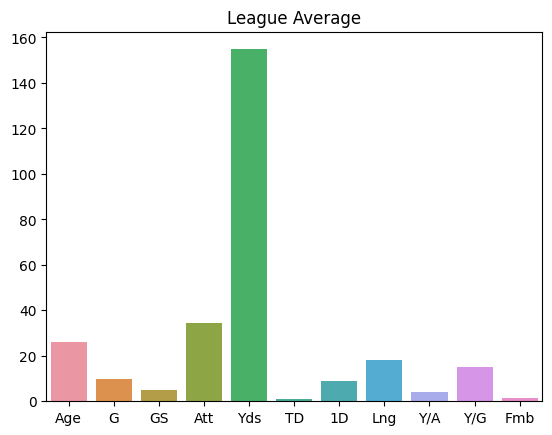

In [69]:
plt.figure()
sns.barplot(data=test_df).set(title="League Average")
# sns.scatterplot(data=bool_mask, legend=False)